In [1]:
import requests as rq
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
pip install nba_api

Note: you may need to restart the kernel to use updated packages.


In [3]:
from nba_api.stats.static import players
from nba_api.stats.static import teams
from nba_api.stats.endpoints import shotchartdetail
from nba_api.stats.endpoints import playercareerstats

In [4]:
# Find teams by full name.
teams.find_teams_by_full_name('chicago')

# # Find teams by state.
# teams.find_teams_by_state('ohio')

# # Find teams by city.
# teams.find_teams_by_city('chicago')

# # Find teams by team nickname.
# teams.find_teams_by_nickname('cav')

# # Find teams by year founded.
# teams.find_teams_by_year_founded(1968)

# # Find teams by abbreviation.
# teams.find_team_by_abbreviation('cle')

# # Find teams by id.
# teams.find_team_name_by_id(1610612739)

# # Get all teams.
# teams.get_teams()

[{'id': 1610612741,
  'full_name': 'Chicago Bulls',
  'abbreviation': 'CHI',
  'nickname': 'Bulls',
  'city': 'Chicago',
  'state': 'Illinois',
  'year_founded': 1966}]

In [5]:
players.find_players_by_full_name('Duncan Robinson')

[{'id': 1629130,
  'full_name': 'Duncan Robinson',
  'first_name': 'Duncan',
  'last_name': 'Robinson',
  'is_active': True}]

In [6]:
Duncan_Robinson_career = playercareerstats.PlayerCareerStats(player_id='1629130')
Duncan_Robinson_career_stats_df = Duncan_Robinson_career.get_data_frames()[0]
Duncan_Robinson_career_stats_df.head()

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,1629130,2018-19,00,1610612748,MIA,25.0,15,1,161.0,18,...,0.667,2,17,19,5,5,0,4,11,50
1,1629130,2019-20,00,1610612748,MIA,25.0,65,60,1949.0,286,...,0.906,9,203,212,91,35,15,60,179,863


In [7]:
totals = Duncan_Robinson_career_stats_df.iloc[:,20:]
averages = round(totals.divide(82),2)
averages.index += 1
averages

,REB,AST,STL,BLK,TOV,PF,PTS
1,0.23,0.06,0.06,0.00,0.05,0.13,0.61
2,2.59,1.11,0.43,0.18,0.73,2.18,10.52


In [8]:
Duncan_Robinson_career = shotchartdetail.ShotChartDetail(team_id='1610612748',player_id='1629130')
Duncan_Robinson_career_df = Duncan_Robinson_career.get_data_frames()[0]
Duncan_Robinson_career_df

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021800054,197,1629130,Duncan Robinson,1610612748,Miami Heat,2,8,37,...,Left Side Center(LC),24+ ft.,24,-185,168,1,1,20181024,MIA,NYK
1,Shot Chart Detail,0021800250,499,1629130,Duncan Robinson,1610612748,Miami Heat,3,0,11,...,Left Side Center(LC),24+ ft.,24,-217,111,1,1,20181120,MIA,BKN
2,Shot Chart Detail,0021800824,189,1629130,Duncan Robinson,1610612748,Miami Heat,2,11,6,...,Center(C),16-24 ft.,20,-38,197,1,1,20190208,SAC,MIA
3,Shot Chart Detail,0021800888,339,1629130,Duncan Robinson,1610612748,Miami Heat,3,11,0,...,Right Side Center(RC),24+ ft.,25,154,199,1,1,20190223,MIA,DET
4,Shot Chart Detail,0021800901,272,1629130,Duncan Robinson,1610612748,Miami Heat,2,5,51,...,Right Side(R),24+ ft.,23,230,62,1,1,20190225,MIA,PHX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,Shot Chart Detail,0021900951,627,1629130,Duncan Robinson,1610612748,Miami Heat,4,1,40,...,Left Side Center(LC),24+ ft.,28,-126,253,1,1,20200308,WAS,MIA
300,Shot Chart Detail,0021900951,635,1629130,Duncan Robinson,1610612748,Miami Heat,4,0,44,...,Right Side(R),24+ ft.,23,233,21,1,1,20200308,WAS,MIA
301,Shot Chart Detail,0021900970,55,1629130,Duncan Robinson,1610612748,Miami Heat,1,6,48,...,Center(C),24+ ft.,24,0,248,1,1,20200311,MIA,CHA
302,Shot Chart Detail,0021900970,99,1629130,Duncan Robinson,1610612748,Miami Heat,1,3,16,...,Left Side(L),24+ ft.,23,-230,17,1,1,20200311,MIA,CHA


In [10]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=1, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

#     # Center Court
#     center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
#                            linewidth=lw, color=color)
#     center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
#                            linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 400, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

In [13]:
Duncan_Robinson_career_df.loc[:,'SHOT_ZONE_RANGE'].value_counts()

24+ ft.            253
Less Than 8 ft.     44
8-16 ft.             4
16-24 ft.            3
Name: SHOT_ZONE_RANGE, dtype: int64

Duncan Robinson made 304 total career shots 


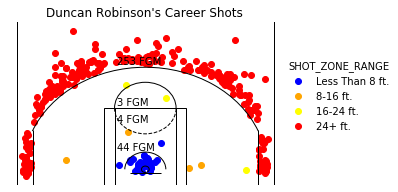

In [14]:
#Set up colors and labels
Distance = ['Less Than 8 ft.', '8-16 ft.', '16-24 ft.', '24+ ft.']
Colors = ['Blue', 'Orange', 'Yellow', 'Red']

#Plot the graph
TD = sns.FacetGrid(data=Duncan_Robinson_career_df, hue='SHOT_ZONE_RANGE', hue_order=Distance, palette =  Colors, aspect=1.61)
TD.map(plt.scatter, 'LOC_X', 'LOC_Y').add_legend()
draw_court(outer_lines=True)

#Add Text FGM Labels to scatterplot
plt.text(-55,45, '44 FGM')
plt.text(-55,110, '4 FGM')
plt.text(-55,150, '3 FGM')
plt.text(-55,245, '253 FGM')

#Cleanup graph/ add necessary info
plt.axis('off')
plt.title("Duncan Robinson's Career Shots")
print(f"Duncan Robinson made {44 + 4 + 3 + 253} total career shots ")
plt.show()
